In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('allseasons.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,White_catfish,Atl_salmon,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,0.0,0.0,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436
1,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,0.0,0.0,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070
2,NJOT_Feb_24_12,NJOT,2/1/24,Feb_24,edna,Trawl,12,B,1,bony,...,0.0,0.0,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090
3,NJOT_Feb_24_13,NJOT,2/1/24,Feb_24,edna,Trawl,13,B,1,bony,...,0.0,0.0,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131
4,NJOT_Feb_24_14,NJOT,2/1/24,Feb_24,edna,Trawl,14,B,1,bony,...,0.0,0.0,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NJOT_Aug_23_93,NJOT,8/1/23,Aug_23,edna,Trawl,93,B,1,bony,...,0.0,0.0,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904
80,NJOT_Aug_23_94,NJOT,8/1/23,Aug_23,edna,Trawl,94,B,1,bony,...,0.0,0.0,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629
81,NJOT_Aug_23_95,NJOT,8/1/23,Aug_23,edna,Trawl,95,B,1,bony,...,0.0,0.0,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314
82,NJOT_Aug_23_97,NJOT,8/1/23,Aug_23,edna,Trawl,97,B,1,bony,...,0.0,0.0,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192


## Exploratory Data Analysis

#### Part 1: Temperature, salinity, and stratification avg by season

In [42]:
columns = ['Surface_Temp', 'Surface_Salinity', 'Bottom_Temp', 'Bottom_Salinity', 'temp_strat', 'salt_strat']

##change based off season
sliced_df=df.loc[df['sampling_bout']=='Jun_23']
# sliced_df=df.loc[df['sampling_bout']=='Aug_23']
sliced_df=df.loc[df['sampling_bout']=='Feb_24']
summary_stats = sliced_df[columns].describe()
summary_stats

,Surface_Temp,Surface_Salinity,Bottom_Temp,Bottom_Salinity,temp_strat,salt_strat
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.884859,28.815302,5.911421,30.052543,0.281400,1.240503
std,0.438544,2.181479,0.399104,0.876863,0.315077,1.656456
min,4.708212,22.594429,5.016651,27.461980,0.009290,0.000391
25%,5.581006,28.102602,5.609716,29.913880,0.082165,0.050269
50%,5.932552,29.741372,5.972974,30.263573,0.172925,0.231070
75%,6.126090,30.308458,6.139387,30.548435,0.311403,2.140432
max,6.775392,30.839665,6.736478,30.945559,1.333313,4.880312


Average Surface Temp (Feb, June, Aug): 5.88, 16.62, 22.23  
Average Surface Salinity: 28.815, 29.741, 30.581  
Average Temperature Stratification: 0.281, 2.518, 4.739

#### Part 2: Dimensionality Reduction using PCA/tSNE on Dataset (*with Oceanographic Data*)

In [50]:
fish_asvs = df.iloc[:, 11:]
fish_asvs
tsne_df = df
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=20, perplexity=20, learning_rate=5, n_iter=300) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
tsne_df['tSNE1'] = tsne_result[:, 0]
tsne_df['tSNE2'] = tsne_result[:, 1]
tsne_df


,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,tSNE1,tSNE2
0,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,-74.568000,38.874000,5.956091,5.913677,30.449176,30.469612,0.042414,0.020436,7.601243,0.009691
1,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,-74.618000,38.724000,6.265040,6.349604,30.647220,30.878290,0.084564,0.231070,7.765104,-0.021521
2,NJOT_Feb_24_12,NJOT,2/1/24,Feb_24,edna,Trawl,12,B,1,bony,...,-74.672000,38.728000,6.141931,6.000855,30.286460,30.501550,0.141076,0.215090,7.533642,-0.052634
3,NJOT_Feb_24_13,NJOT,2/1/24,Feb_24,edna,Trawl,13,B,1,bony,...,-74.928000,38.905000,5.563858,5.591211,30.637451,30.595319,0.027353,0.042131,7.717847,0.136137
4,NJOT_Feb_24_14,NJOT,2/1/24,Feb_24,edna,Trawl,14,B,1,bony,...,-74.969000,38.843000,5.451434,5.624359,29.023967,30.008847,0.172925,0.984880,6.740750,-0.028434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NJOT_Aug_23_93,NJOT,8/1/23,Aug_23,edna,Trawl,93,B,1,bony,...,-74.828700,38.954683,21.207851,20.596615,31.790128,31.808032,0.611236,0.017904,-7.865280,0.185559
80,NJOT_Aug_23_94,NJOT,8/1/23,Aug_23,edna,Trawl,94,B,1,bony,...,-74.676950,39.141033,20.492487,18.477310,31.893909,31.978538,2.015177,0.084629,-7.304456,-0.245515
81,NJOT_Aug_23_95,NJOT,8/1/23,Aug_23,edna,Trawl,95,B,1,bony,...,-74.497300,39.165833,20.549352,16.286042,31.850125,32.115440,4.263310,0.265314,-6.410927,-0.420506
82,NJOT_Aug_23_97,NJOT,8/1/23,Aug_23,edna,Trawl,97,B,1,bony,...,-74.023817,39.357500,22.971803,14.291715,31.494135,32.288327,8.680087,0.794192,-4.992994,-0.260152


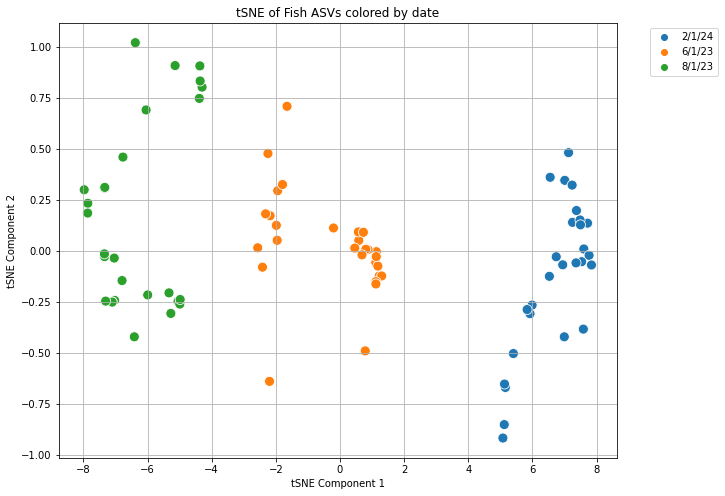

In [51]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df, hue='date', s=100, palette='tab10')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Build Model

Specifications for model: keep date, oceanographic variables.
If date is a strong predictor, influence of migratory species may be too high! Remove.

In [ ]:
## Keep date - modify existing code
## Plot feature importance